**Imports**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

**Retrieve Data & Split**

In [3]:
co2Data = pd.read_csv('co2_data/co2ppm_scripps_may20.csv')

yearIndex = []
for i, j in enumerate(co2Data['year']):
    if i == 0:
        yearIndex.append(i)
    else:
        if j != co2Data['year'][i-1]:
            yearIndex.append(i)
            


Dataframes - Recession

In [4]:
#recession dataframe (dec 2007-june 2009)

recFrame = co2Data.iloc[yearIndex[7]+11:yearIndex[9]+6]

#pre recession dataframe (dec 2005-june 2007)

preRecFrame = co2Data.iloc[yearIndex[5]+11:yearIndex[7]+6]


Dataframes - Covid

In [5]:
#covid dataframe (nov 2020 - present)

covFrame = co2Data.iloc[yearIndex[19]+10:]


#pre covid dataframe (nov 2018 - latest of 20 frame)

preCovFrame = co2Data.iloc[yearIndex[18]+10:yearIndex[18]+10+len(covFrame)]
a = preCovFrame['decimal date'].tolist()


In [7]:
#taking month frames for plots
def monthframe(x):
    """indexing for months from decimal dates in csv file"""
    months = {
        '042' : 'Jan',
        '125' : 'Feb',
        '208' : 'Mar',
        '292' : 'Apr',
        '375' : 'May',
        '458' : 'Jun',
        '542' : 'Jul',
        '625' : 'Aug',
        '708' : 'Sep',
        '792' : 'Oct',
        '875' : 'Nov',
        '958' : 'Dec'
        }
    monthFrame = []
    for i in x:
        i = round(i, 3)
        m = months[str(i)[5:]]
        monthFrame.append(m)
    return monthFrame

covMonFrame, recMonFrame = [monthframe(covFrame['decimal date'].tolist()), monthframe(recFrame['decimal date'].tolist())]



**Plots**

Covid Frames (pre/during)

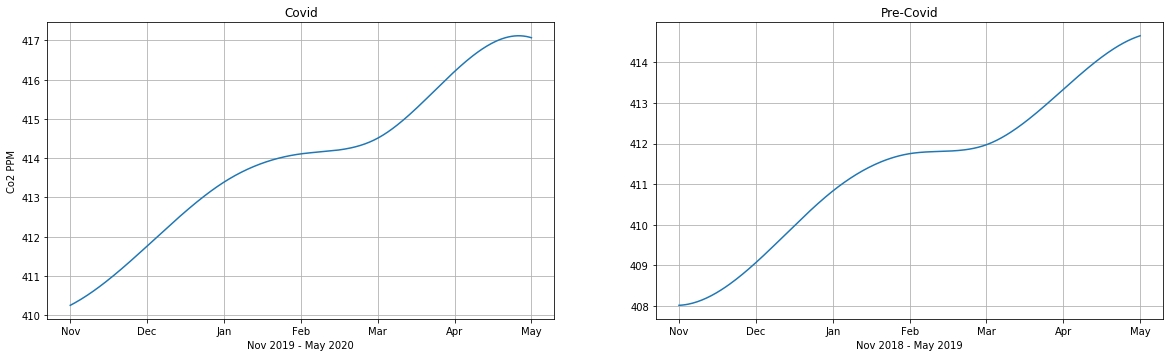

In [14]:
plt.figure(figsize=(20,12))

#covid frame
plt.subplot(221)

y = np.array(covFrame['average'].tolist())
x = np.array(list(range(len(covMonFrame))))
x_new = np.linspace(x.min(),x.max(), 300, endpoint=True)
y_new = interp1d(x, y, kind='cubic')

plt.plot(x_new, y_new(x_new))
plt.xticks(ticks=range(len(covMonFrame)),labels=covMonFrame)
plt.xlabel('Nov 2019 - May 2020')

plt.ylabel('Co2 PPM')
plt.title('Covid')
plt.grid()

#precovid frame
plt.subplot(222)

y = np.array(preCovFrame['average'].tolist())
x = np.array(list(range(len(covMonFrame))))
x_new = np.linspace(x.min(),x.max(), 300, endpoint=True)
y_new = interp1d(x, y, kind='cubic')

plt.plot(x_new, y_new(x_new))
plt.xticks(ticks=range(len(covMonFrame)),labels=covMonFrame)
plt.xlabel('Nov 2018 - May 2019')

plt.title('Pre-Covid')
plt.grid()

plt.show()


Recession Frames (pre/during)

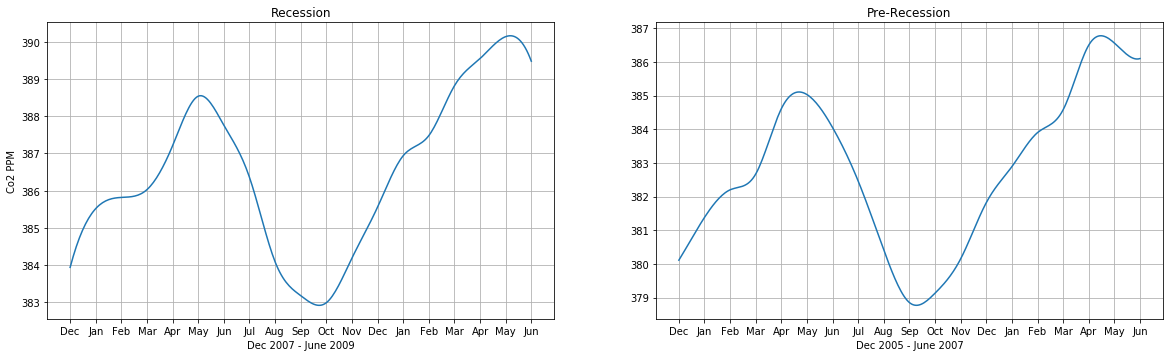

In [15]:
plt.figure(figsize=(20,12))

#recession frame
plt.subplot(221)

y = np.array(recFrame['average'].tolist())
x = np.array(list(range(len(recMonFrame))))
x_new = np.linspace(x.min(),x.max(), 300, endpoint=True)
y_new = interp1d(x, y, kind='cubic')

plt.plot(x_new, y_new(x_new))
plt.xticks(ticks=range(len(recMonFrame)),labels=recMonFrame)
plt.xlabel('Dec 2007 - June 2009')

plt.ylabel('Co2 PPM')
plt.title('Recession')
plt.grid()

#prerecession frame
plt.subplot(222)

y = np.array(preRecFrame['average'].tolist())
x = np.array(list(range(len(recMonFrame))))
x_new = np.linspace(x.min(),x.max(), 300, endpoint=True)
y_new = interp1d(x, y, kind='cubic')

plt.plot(x_new, y_new(x_new))
plt.xticks(ticks=range(len(recMonFrame)),labels=recMonFrame)
plt.xlabel('Dec 2005 - June 2007')

plt.title('Pre-Recession')
plt.grid()

plt.show()


**COVID Trend line**

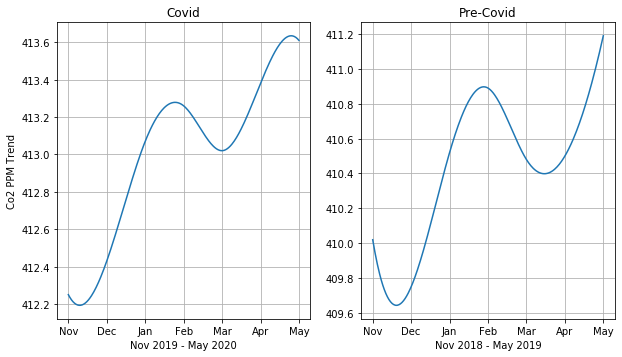

In [16]:
plt.figure(figsize=(10,12))

#covid frame
plt.subplot(221)

y = np.array(covFrame['trend (seasonal corr)'].tolist())
x = np.array(list(range(len(covMonFrame))))
x_new = np.linspace(x.min(),x.max(), 300, endpoint=True)
y_new = interp1d(x, y, kind='cubic')

plt.plot(x_new, y_new(x_new))
plt.xticks(ticks=range(len(covMonFrame)),labels=covMonFrame)
plt.xlabel('Nov 2019 - May 2020')

plt.ylabel('Co2 PPM Trend')
plt.title('Covid')
plt.grid()

#precovid frame
plt.subplot(222)

y = np.array(preCovFrame['trend (seasonal corr)'].tolist())
x = np.array(list(range(len(covMonFrame))))
x_new = np.linspace(x.min(),x.max(), 300, endpoint=True)
y_new = interp1d(x, y, kind='cubic')

plt.plot(x_new, y_new(x_new))
plt.xticks(ticks=range(len(covMonFrame)),labels=covMonFrame)
plt.xlabel('Nov 2018 - May 2019')

plt.title('Pre-Covid')
plt.grid()

plt.show()



**Recession Trendline**

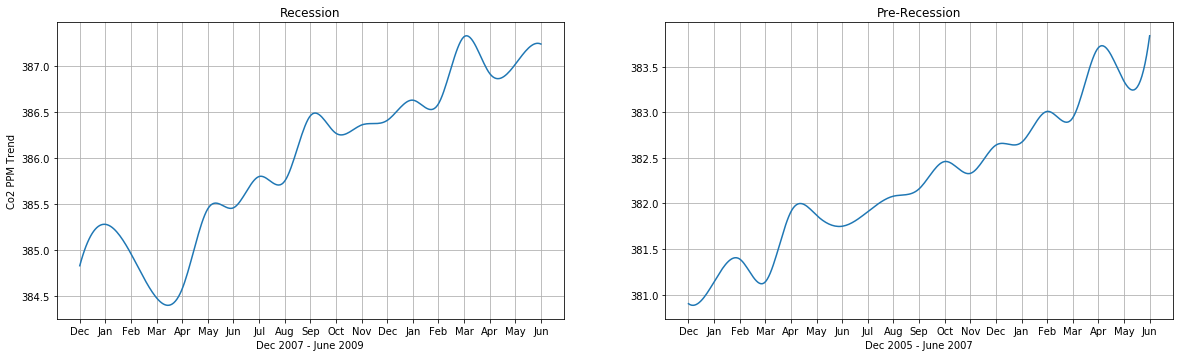

In [17]:
plt.figure(figsize=(20,12))

#recession frame
plt.subplot(221)

y = np.array(recFrame['trend (seasonal corr)'].tolist())
x = np.array(list(range(len(recMonFrame))))
x_new = np.linspace(x.min(),x.max(), 300, endpoint=True)
y_new = interp1d(x, y, kind='cubic')

plt.plot(x_new, y_new(x_new))
plt.xticks(ticks=range(len(recMonFrame)),labels=recMonFrame)
plt.xlabel('Dec 2007 - June 2009')

plt.ylabel('Co2 PPM Trend')
plt.title('Recession')
plt.grid()

#prerecession frame
plt.subplot(222)

y = np.array(preRecFrame['trend (seasonal corr)'].tolist())
x = np.array(list(range(len(recMonFrame))))
x_new = np.linspace(x.min(),x.max(), 300, endpoint=True)
y_new = interp1d(x, y, kind='cubic')

plt.plot(x_new, y_new(x_new))
plt.xticks(ticks=range(len(recMonFrame)),labels=recMonFrame)
plt.xlabel('Dec 2005 - June 2007')

plt.title('Pre-Recession')
plt.grid()

plt.show()